In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import os
import getdist
from getdist import plots, MCSamples
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rc('legend',fontsize=14)

In [2]:
chain1 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain2 = pd.read_csv("../chains/DES_wlwl_Nzs_TAP_0.6/chain_1.csv")
chain3 = pd.concat([chain1, chain2])
path = "../chains/DES_wlwl_Nzs_TAP_0.6/"
os.path.isfile(path+"chain_{}.csv".format(1))

True

In [3]:
def add_chains(path):
    chains = []
    i = 1 
    while os.path.isfile(path+"chain_{}.csv".format(i)):
        chain = pd.read_csv(path+"chain_{}.csv".format(i))
        chains.append(chain)
        i += 1
    return pd.concat(chains)

In [14]:
ND_gp = add_chains("../chains/ND_gp_hp_TAP_0.6/")
SD_gp = add_chains("../chains/SD_gp_hp_TAP_0.6/")
wlwl_test = add_chains("../chains/DES_wlwl_Nzs_test_TAP_0.6/")
wlwl_Nzs_Omega = add_chains("../chains/DES_wlwl_Nzs_Omega_TAP_0.6/")
wlwl_Nz10_Omega = add_chains("../chains/DES_wlwl_Nz0_Omega_TAP_0.6/")

In [30]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'h': 'h',
               'Ωm': '\Omega_m',
               'Ωb': '\Omega_b',
               'ns': 'n_s',
               's8': '\sigma_8',
               'A_IA': 'A_{IA}',
               'alpha_IA': r'\alpha_{IA}',
               'DESgc__0_0_dz': 'dz_{DESY1gc \, 0}',
               
               'DESgc__1_0_dz': 'dz_{DESY1gc \, 1}',
               'DESgc__2_0_dz': 'dz_{DESY1gc \, 2}',
               'DESgc__3_0_dz': 'dz_{DESY1gc \, 3}',
               'DESgc__4_0_dz': 'dz_{DESY1gc \, 4}',
               
               'DESwl__0_e_nz[1]': 'Nz_{DESY1wl \, 1}',
               'DESwl__0_e_nz[2]': 'Nz_{DESY1wl \, 2}',
               'DESwl__0_e_nz[3]': 'Nz_{DESY1wl \, 3}',
               'DESwl__0_e_nz[4]': 'Nz_{DESY1wl \, 4}',
               'DESwl__0_e_nz[5]': 'Nz_{DESY1wl \, 5}',
               'DESwl__0_e_nz[6]': 'Nz_{DESY1wl \, 6}',
               'DESwl__0_e_nz[7]': 'Nz_{DESY1wl \, 7}',
               'DESwl__0_e_nz[8]': 'Nz_{DESY1wl \, 8}',
               'DESwl__0_e_nz[9]': 'Nz_{DESY1wl \, 9}',
               'DESwl__0_e_nz[10]': 'Nz_{DESY1wl \, 10}',
               
               'DESgc__0_e_dz': 'dz_{DESY1wl \, 0}',
               'DESgc__1_e_dz': 'dz_{DESY1wl \, 1}',
               'DESgc__2_e_dz': 'dz_{DESY1wl \, 2}',
               'DESgc__3_e_dz': 'dz_{DESY1wl \, 3}',
               'DESgc__0_0_b': 'b_{DESY1 \, 0}',
               'DESgc__1_0_b': 'b_{DESY1 \, 1}',
               'DESgc__2_0_b': 'b_{DESY1 \, 2}',
               'DESgc__3_0_b': 'b_{DESY1 \, 3}',
               'DESgc__4_0_b': 'b_{DESY1 \, 4}',
               'DESwl__0_e_m': 'm_{DESY1 \, 0 }',
               'DESwl__1_e_m': 'm_{DESY1 \, 1 }',
               'DESwl__2_e_m': 'm_{DESY1 \, 2 }', 
               'DESwl__3_e_m': 'm_{DESY1 \, 3 }',
               
               'eBOSS__0_0_b': 'b_{eBOSS \, 0}',
               'eBOSS__1_0_b': 'b_{eBOSS \, 1}',
               
               "DECALS__0_0_b": 'b_{DECALS \, 0}',
               "DECALS__1_0_b": 'b_{DECALS \, 1}',
               "DECALS__2_0_b": 'b_{DECALS \, 2}',
               "DECALS__3_0_b": 'b_{DECALS \, 3}',
               "DECALS__0_0_dz": 'dz_{DECALS \, 0}',
               "DECALS__1_0_dz": 'dz_{DECALS \, 1}',
               "DECALS__2_0_dz": 'dz_{DECALS \, 2}',
               "DECALS__3_0_dz": 'dz_{DECALS \, 3}',

               "KiDS1000__0_e_dz": 'dz_{KiDS \, 0}',
               "KiDS1000__1_e_dz": 'dz_{KiDS \, 1}',
               "KiDS1000__2_e_dz": 'dz_{KiDS \, 2}',
               "KiDS1000__3_e_dz": 'dz_{KiDS \, 3}',
               "KiDS1000__4_e_dz": 'dz_{KiDS \, 4}',
               "KiDS1000__0_e_m": 'm_{KiDS \, 0}',
               "KiDS1000__1_e_m": 'm_{KiDS \, 1}',
               "KiDS1000__2_e_m": 'm_{KiDS \, 2}',
               "KiDS1000__3_e_m": 'm_{KiDS \, 3}',
               "KiDS1000__4_e_m": 'm_{KiDS \, 4}'}

In [31]:
def make_chain(file, label, ranges=dict({})):
    params = np.array(file.keys()[2:-12])
    names = []
    labels = []
    samples = []
    for param in params:
        if param in labels_dict.keys():
            print(param)
            names.append(param) 
            labels.append(labels_dict[param]) 
            samples.append(file[param])

    names = np.array(names)
    labels = np.array(labels)
    samples = np.transpose(np.array(samples))
    print("========")

    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges,
                    settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.4, 'smooth_scale_1D':0.3})
    

In [32]:
SD_gp_samples = make_chain(SD_gp, r"SD_{gp}")
ND_gp_samples = make_chain(ND_gp, r"ND_{gp}")
wlwl_test_samples = make_chain(wlwl_test, r"$DESY1 WL$ test")
wlwl_Nzs_Omega_samples = make_chain(wlwl_Nzs_Omega, r"$DESY1 WL Nzs Omega$")
wlwl_Nz10_Omega_samples = make_chain(wlwl_Nz10_Omega, r"$DESY1 WL Nz 10 Omega$")

Ωm
Ωb
h
ns
A_IA
alpha_IA
eBOSS__0_0_b
eBOSS__1_0_b
DECALS__0_0_b
DECALS__1_0_b
DECALS__2_0_b
DECALS__3_0_b
DECALS__0_0_dz
DECALS__1_0_dz
DECALS__2_0_dz
DECALS__3_0_dz
KiDS1000__0_e_dz
KiDS1000__1_e_dz
KiDS1000__2_e_dz
KiDS1000__3_e_dz
KiDS1000__4_e_dz
KiDS1000__0_e_m
KiDS1000__1_e_m
KiDS1000__2_e_m
KiDS1000__3_e_m
KiDS1000__4_e_m
l
Removed no burn in
Ωm
Ωb
h
ns
DESgc__0_0_b
DESgc__1_0_b
DESgc__2_0_b
DESgc__3_0_b
DESgc__4_0_b
DESgc__0_0_dz
DESgc__1_0_dz
DESgc__2_0_dz
DESgc__3_0_dz
DESgc__4_0_dz
A_IA
alpha_IA
DESwl__0_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__3_e_m
eBOSS__0_0_b
eBOSS__1_0_b
l
Removed no burn in
Ωm
Ωb
h
ns
s8
A_IA
alpha_IA
DESwl__0_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__3_e_m
Removed no burn in
Ωm
Removed no burn in
Ωm
A_IA
alpha_IA
DESwl__0_e_m
DESwl__1_e_m
DESwl__2_e_m
DESwl__3_e_m
Removed no burn in


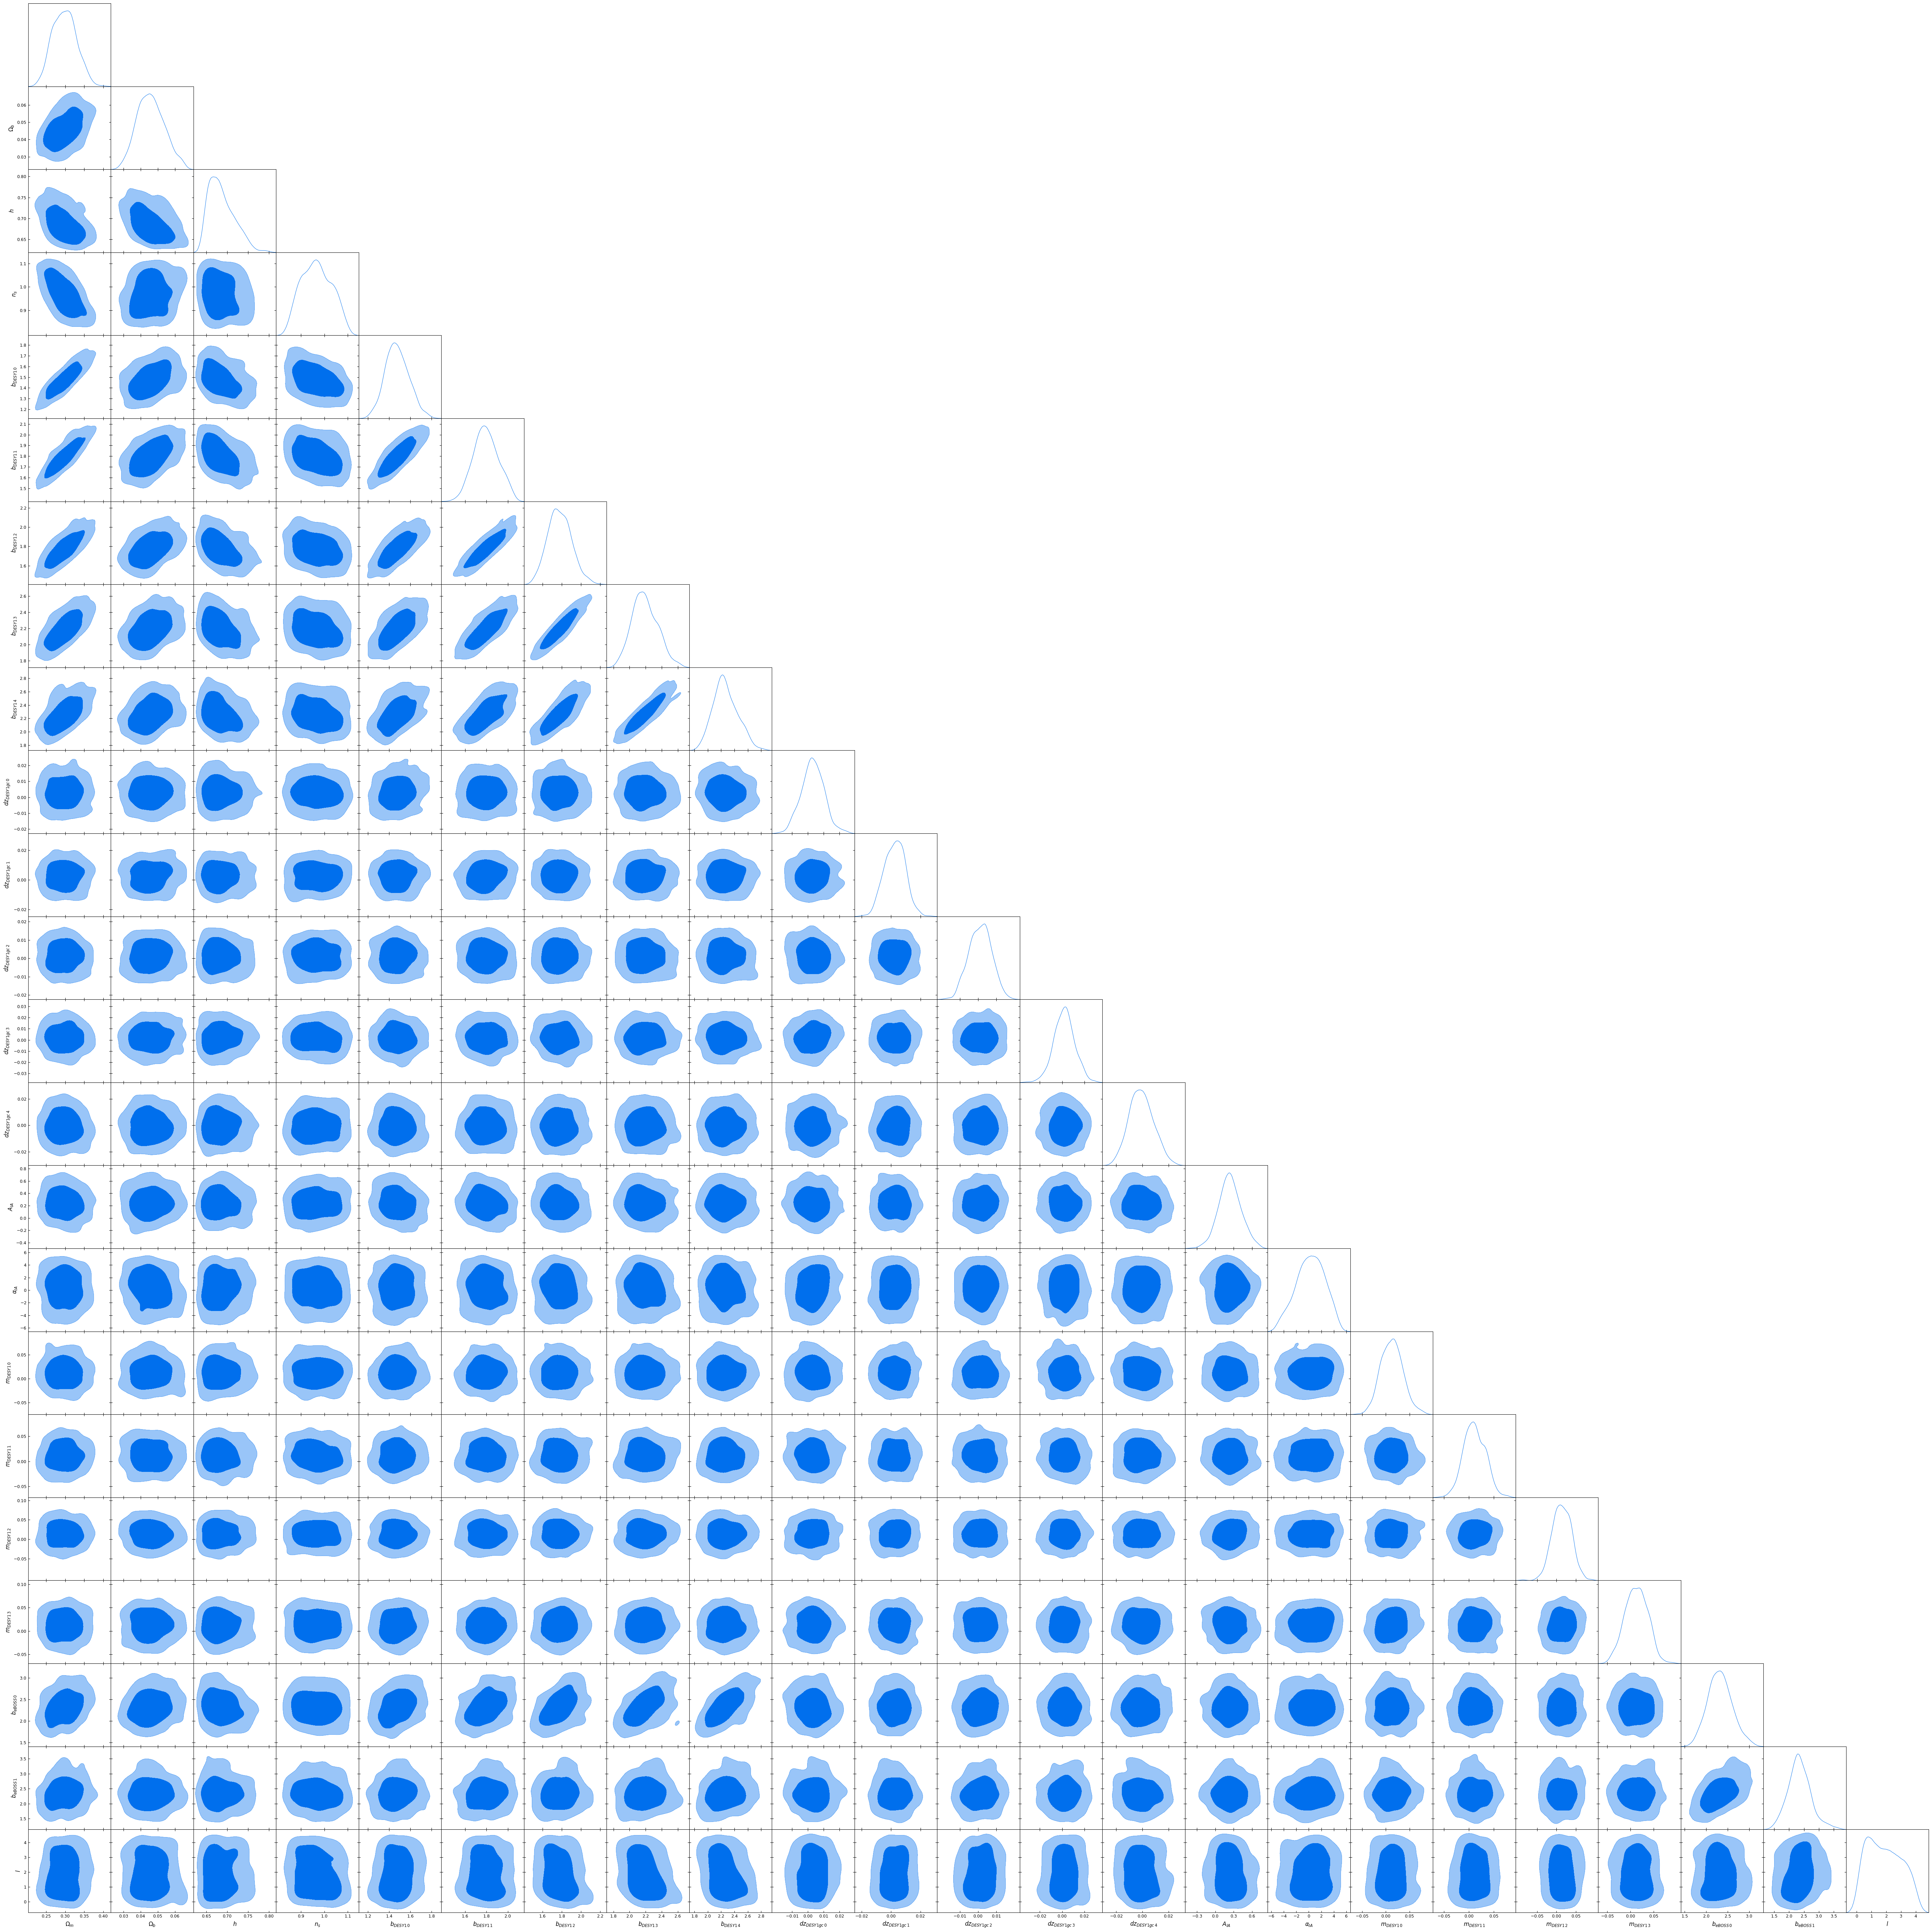

In [69]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(ND_gp_samples, filled=True)

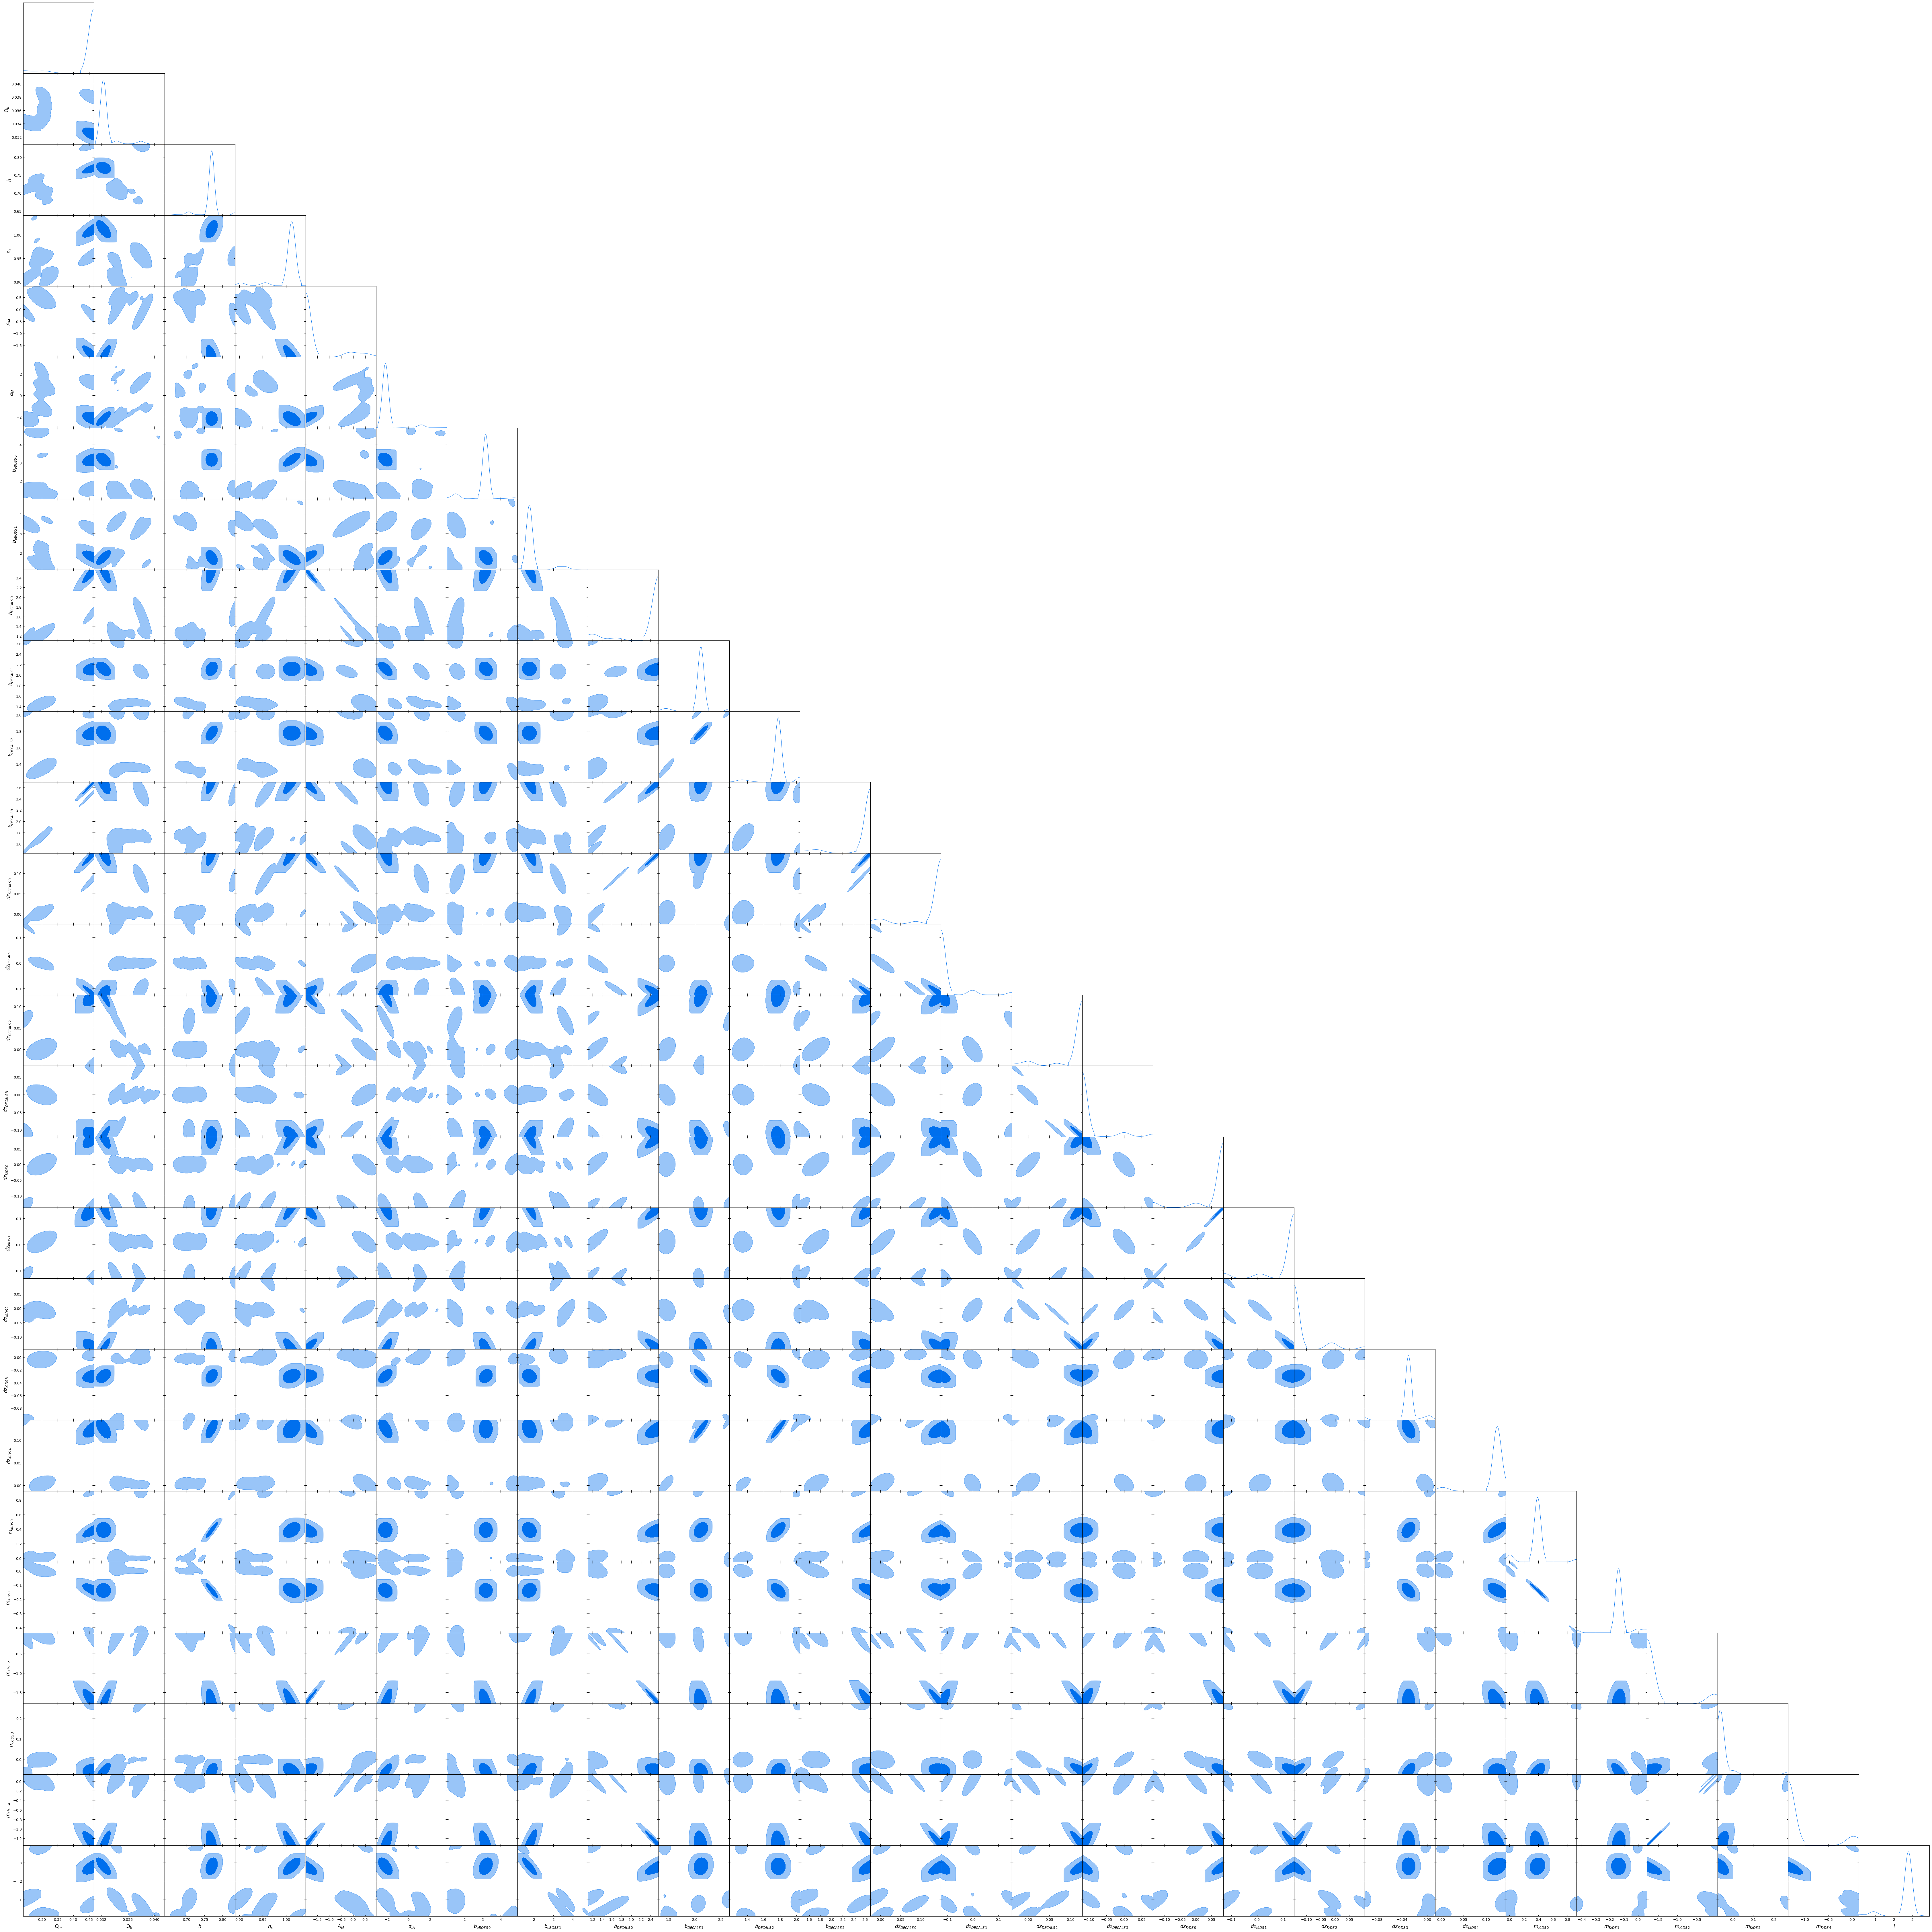

In [33]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(SD_gp_samples, filled=True)

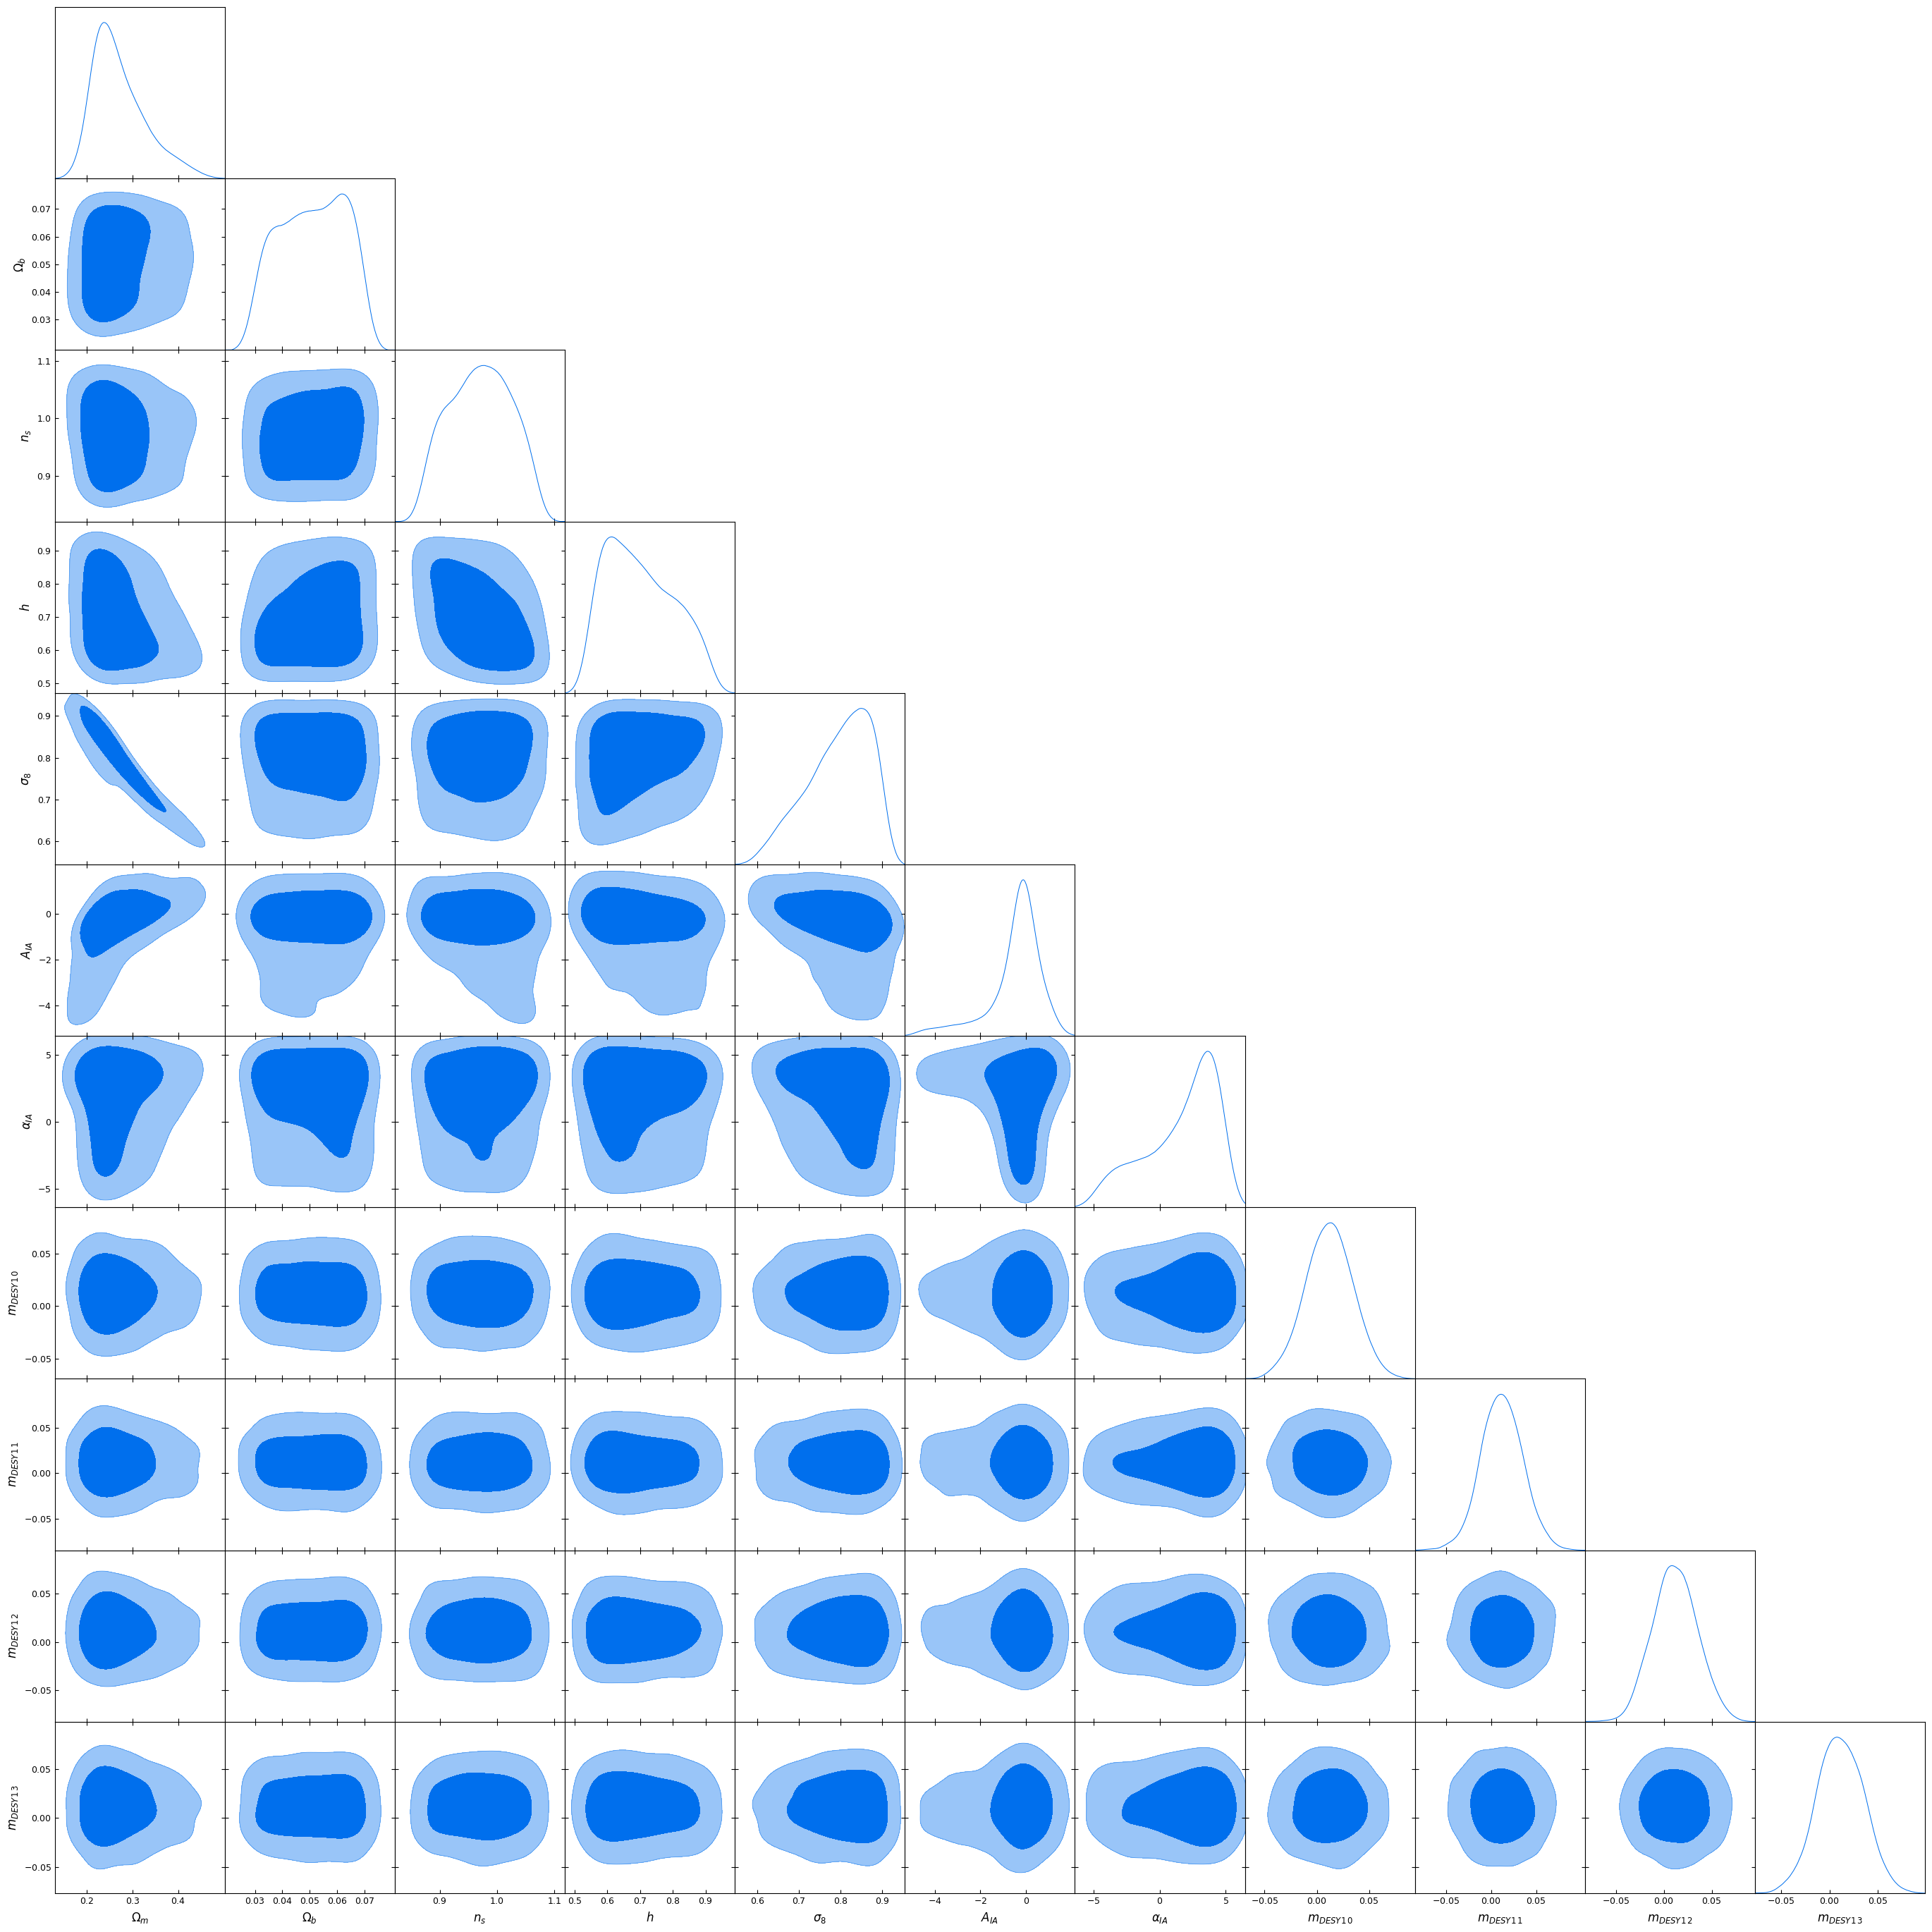

In [70]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_test_samples, ['Ωm', 'Ωb', 'ns', 'h', 's8',
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)

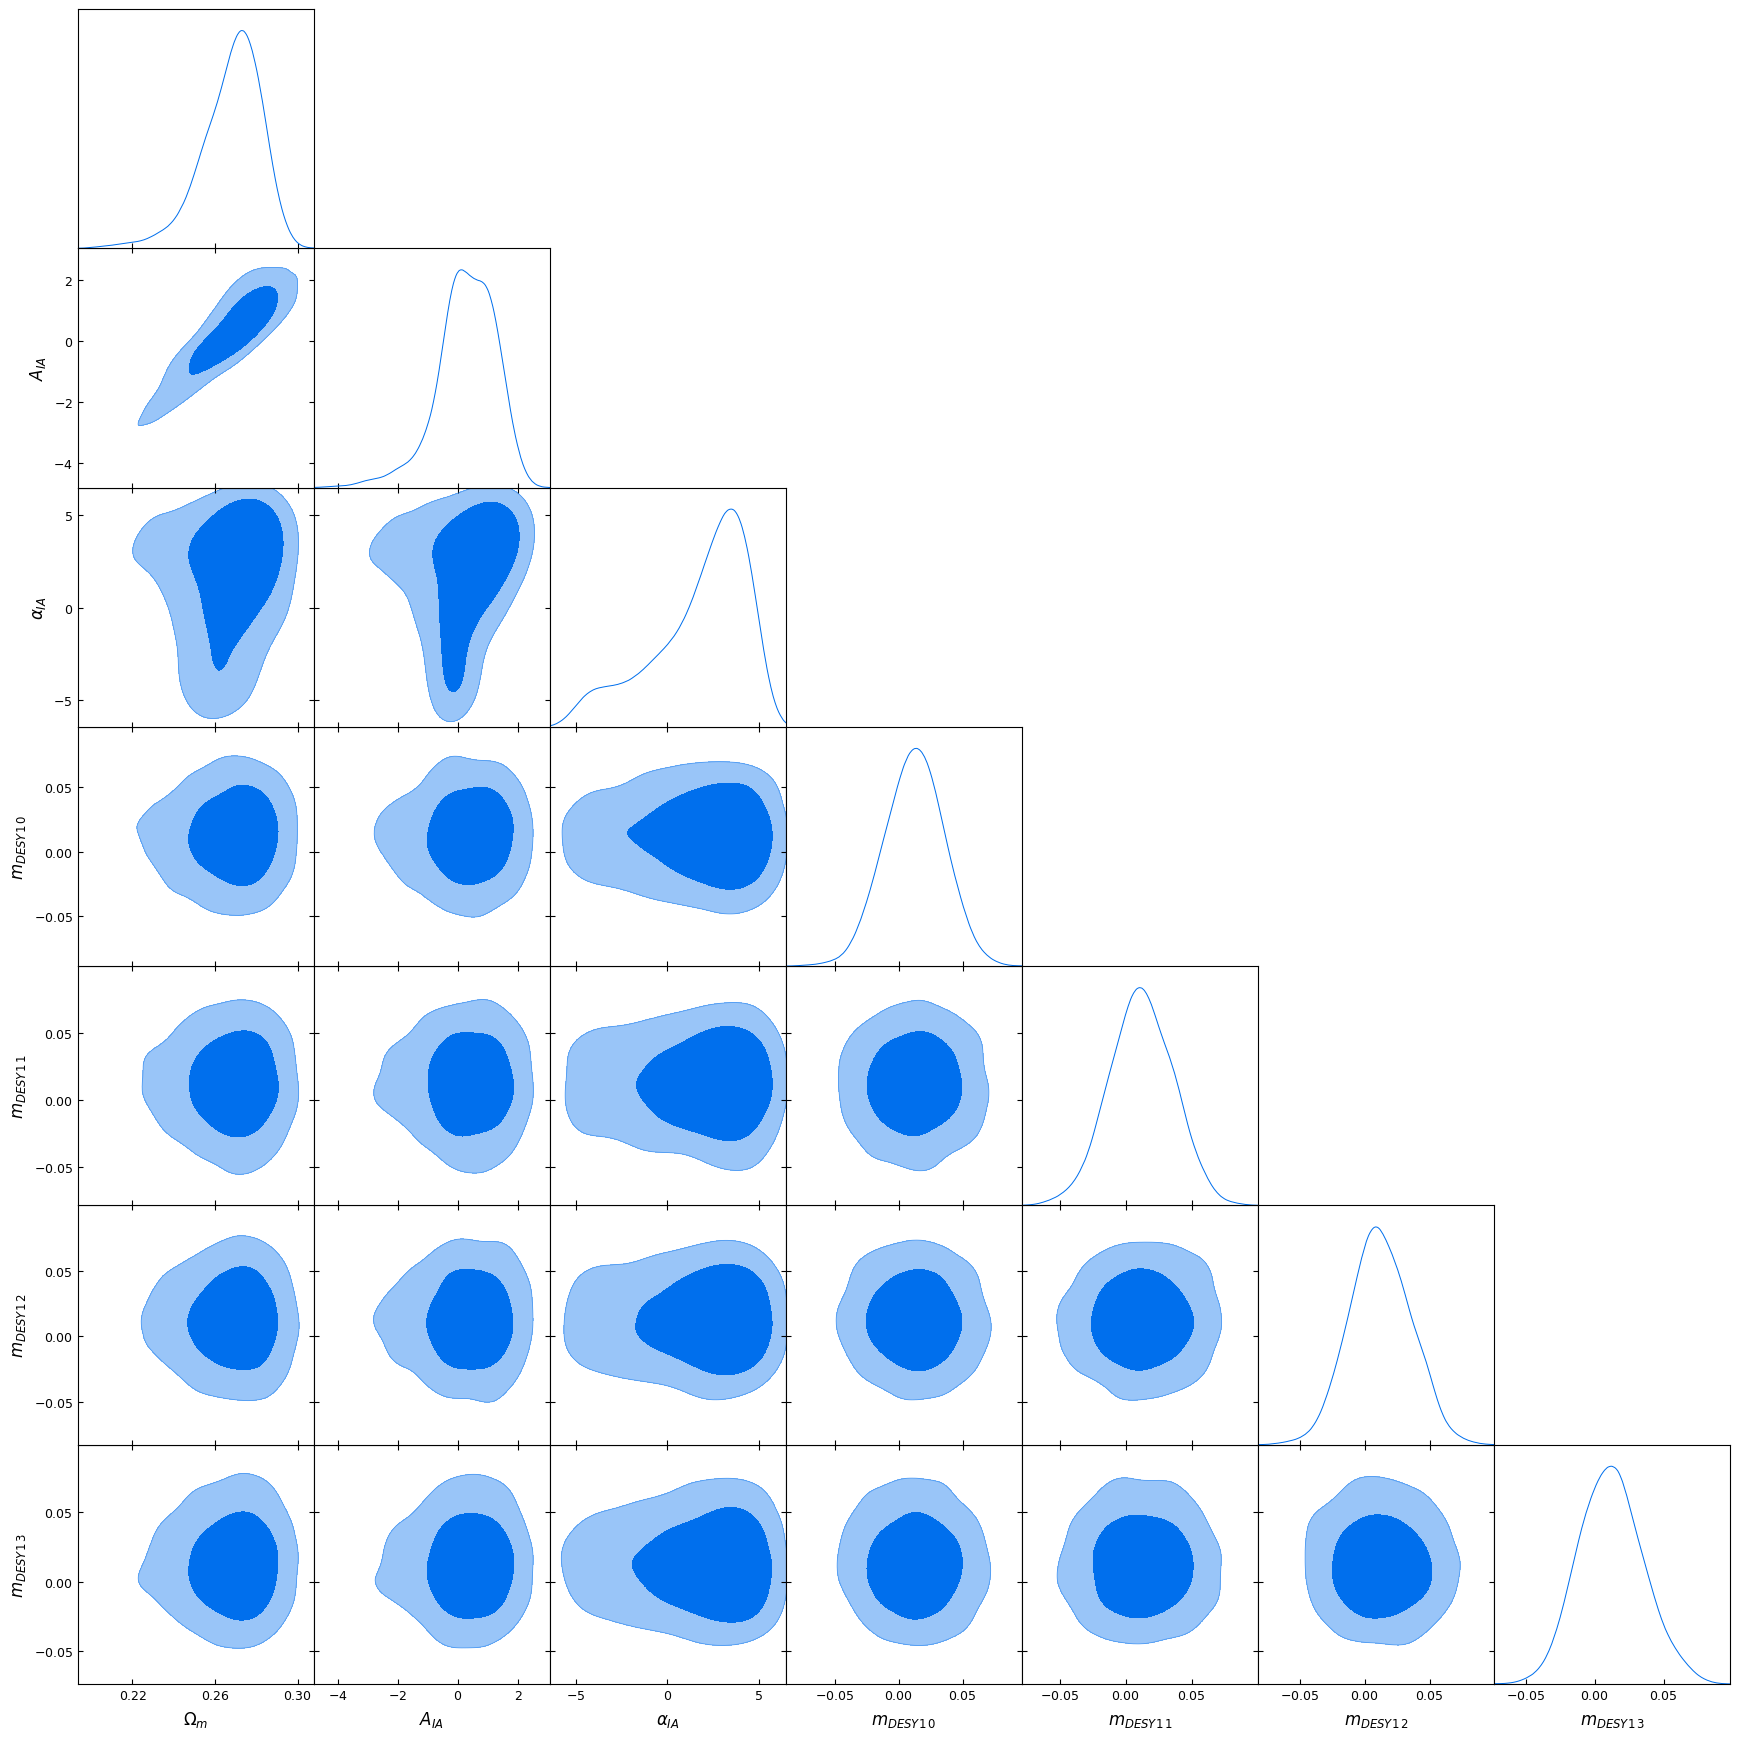

In [20]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_Nz10_Omega_samples, ['Ωm', 
                                    'A_IA', 'alpha_IA',
                                    'DESwl__0_e_m',  'DESwl__1_e_m', 'DESwl__2_e_m',  'DESwl__3_e_m'], filled=True)

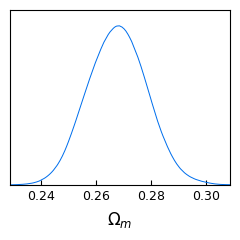

In [22]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot(wlwl_Nzs_Omega_samples, ['Ωm'], filled=True)

## Nzs

In [24]:
Nz0_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__0_e.npz")
Nz1_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__1_e.npz")
Nz2_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__2_e.npz")
Nz3_data = np.load("../data/DESY1/lite10_nzs/nz_DESwl__3_e.npz");

In [25]:
def make_nzs(file, binn):
    nz_names = file.keys()
    sel = [str(binn) + "_e_nz" in name for name in nz_names]
    nz_names = nz_names[sel]
    print(nz_names)
    ms = np.array([])
    ss = np.array([])
    for name in nz_names:
        nz = np.array(file[name])
        ms = np.append(ms, np.mean(nz))
        ss = np.append(ss, np.std(nz))
    return ms, ss

In [26]:
Nz_0_m, Nz_0_s = make_nzs(wlwl_Nzs_Omega, 0)
Nz_1_m, Nz_1_s = make_nzs(wlwl_Nzs_Omega, 1)
Nz_2_m, Nz_2_s = make_nzs(wlwl_Nzs_Omega, 2)
Nz_3_m, Nz_3_s = make_nzs(wlwl_Nzs_Omega, 3)

Index(['DESwl__0_e_nz_1', 'DESwl__0_e_nz_2', 'DESwl__0_e_nz_3',
       'DESwl__0_e_nz_4', 'DESwl__0_e_nz_5', 'DESwl__0_e_nz_6',
       'DESwl__0_e_nz_7', 'DESwl__0_e_nz_8', 'DESwl__0_e_nz_9',
       'DESwl__0_e_nz_10'],
      dtype='object')
Index(['DESwl__1_e_nz_1', 'DESwl__1_e_nz_2', 'DESwl__1_e_nz_3',
       'DESwl__1_e_nz_4', 'DESwl__1_e_nz_5', 'DESwl__1_e_nz_6',
       'DESwl__1_e_nz_7', 'DESwl__1_e_nz_8', 'DESwl__1_e_nz_9',
       'DESwl__1_e_nz_10'],
      dtype='object')
Index(['DESwl__2_e_nz_1', 'DESwl__2_e_nz_2', 'DESwl__2_e_nz_3',
       'DESwl__2_e_nz_4', 'DESwl__2_e_nz_5', 'DESwl__2_e_nz_6',
       'DESwl__2_e_nz_7', 'DESwl__2_e_nz_8', 'DESwl__2_e_nz_9',
       'DESwl__2_e_nz_10'],
      dtype='object')
Index(['DESwl__3_e_nz_1', 'DESwl__3_e_nz_2', 'DESwl__3_e_nz_3',
       'DESwl__3_e_nz_4', 'DESwl__3_e_nz_5', 'DESwl__3_e_nz_6',
       'DESwl__3_e_nz_7', 'DESwl__3_e_nz_8', 'DESwl__3_e_nz_9',
       'DESwl__3_e_nz_10'],
      dtype='object')


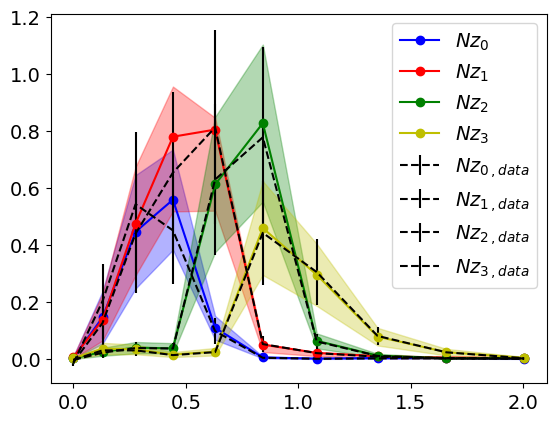

In [28]:
plt.errorbar(Nz0_data["z"], Nz0_data["dndz"], 
             yerr=np.sqrt(Nz0_data["cov"]),
             fmt="k--", label=r"$Nz_{0 \, , data}$")
plt.plot(Nz0_data["z"], Nz_0_m, 'bo-', label=r"$Nz_0$")
plt.fill_between(Nz0_data["z"], Nz_0_m+Nz_0_s, Nz_0_m-Nz_0_s, color='b', alpha=.3)

plt.errorbar(Nz1_data["z"], Nz1_data["dndz"], 
             yerr=np.sqrt(Nz1_data["cov"]),
             fmt="k--", label=r"$Nz_{1 \, , data}$")
plt.plot(Nz1_data["z"], Nz_1_m, 'ro-', label=r"$Nz_1$")
plt.fill_between(Nz1_data["z"], Nz_1_m+Nz_0_s, Nz_1_m-Nz_1_s, color='r', alpha=.3)

plt.errorbar(Nz2_data["z"], Nz2_data["dndz"], 
             yerr=np.sqrt(Nz2_data["cov"]),
             fmt="k--", label=r"$Nz_{2 \, , data}$")
plt.plot(Nz2_data["z"], Nz_2_m, 'go-', label=r"$Nz_2$")
plt.fill_between(Nz2_data["z"], Nz_2_m+Nz_2_s, Nz_2_m-Nz_2_s, color='g', alpha=.3)

plt.errorbar(Nz3_data["z"], Nz3_data["dndz"], 
             yerr=np.sqrt(Nz3_data["cov"]),
             fmt="k--", label=r"$Nz_{3 \, , data}$")
plt.plot(Nz3_data["z"], Nz_3_m, 'yo-', label=r"$Nz_3$")
plt.fill_between(Nz3_data["z"], Nz_3_m+Nz_3_s, Nz_3_m-Nz_3_s, color='y', alpha=.3)

plt.legend();

# GP's

In [34]:
import pyccl as ccl 

In [41]:
gp_z = np.linspace(0, 3, 11)
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+gp_z))

In [46]:
def add_gps(path):
    gps = []
    i = 1 
    while os.path.isfile(path+"gp_{}.npz".format(i)):
        gp = np.load(path+"gp_{}.npz".format(1))
        gps.append(gp)
        i += 1
    return np.concatenate(gps, 1)

In [47]:
gp_ND = add_gps("../chains/ND_gp_hp_TAP_0.6/")
gp_SD = add_gps("../chains/SD_gp_hp_TAP_0.6/")

In [48]:
def get_m_s(file):
    m = np.mean(file, 1)
    s = np.std(file, 1)
    p65 = np.percentile(file, 65, axis=1)
    p95 = np.percentile(file, 95, axis=1)
    s1 = p65-m
    s2 = p95-m
    return m, s, s1, s2

In [49]:
gp_ND_m, gp_ND_s, gp_ND_s1, gp_ND_s2 = get_m_s(gp_ND)
gp_SD_m, gp_SD_s, gp_SD_s1, gp_SD_s2 = get_m_s(gp_SD)

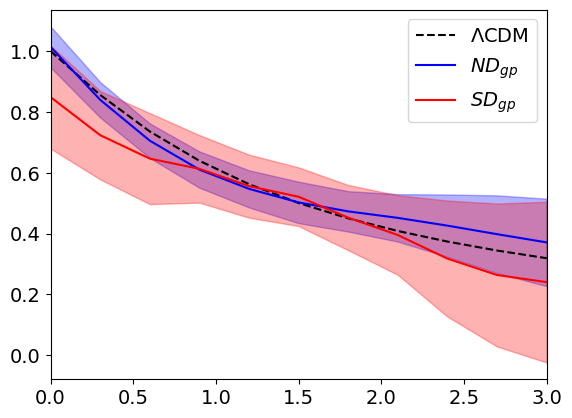

In [50]:
plt.plot(gp_z, LCDM_Dz, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, gp_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, gp_ND_m+gp_ND_s, gp_ND_m-gp_ND_s, color='b', alpha=.3)

plt.plot(gp_z, gp_SD_m, 'r-', label=r"$SD_{gp}$")
plt.fill_between(gp_z, gp_SD_m+gp_SD_s, gp_SD_m-gp_SD_s, color='r', alpha=.3)

plt.xlim(0, 3)
plt.legend()

# S8z

In [51]:
LCDM_S8 = 0.811 * LCDM_Dz/LCDM_Dz[0]

In [52]:
def make_S8(gps, chain):
    Ωms = np.array(chain["Ωm"])
    s8s = [0.811 * gp/gp[0] for gp in np.transpose(gps)]
    S8s = [s8s[i] * np.sqrt(Ωms[i]/0.3) for i in np.arange(len(s8s))]
    return np.transpose(S8s)

In [53]:
S8_ND = make_S8(gp_ND, ND_gp)
S8_SD = make_S8(gp_SD, SD_gp)

In [54]:
S8_ND_m, S8_ND_s, S8_ND_s1, S8_ND_s2 = get_m_s(S8_ND)
S8_SD_m, S8_SD_s, S8_SD_s1, S8_SD_s2 = get_m_s(S8_SD)

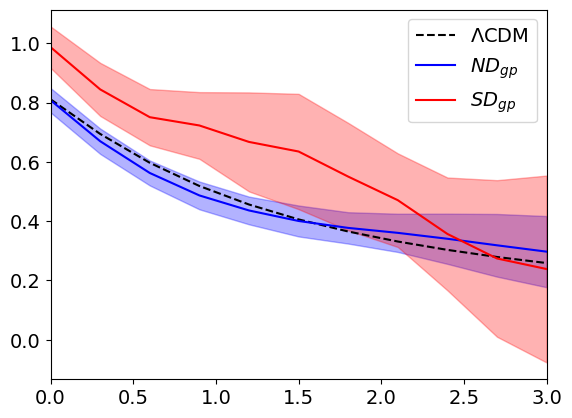

In [55]:
plt.plot(gp_z, LCDM_S8, 'k--', label=r"$\Lambda$CDM")

plt.plot(gp_z, S8_ND_m, 'b-', label=r"$ND_{gp}$")
plt.fill_between(gp_z, S8_ND_m+S8_ND_s, S8_ND_m-S8_ND_s, color='b', alpha=.3)

plt.plot(gp_z, S8_SD_m, 'r-', label=r"$SD_{gp}$")
plt.fill_between(gp_z, S8_SD_m+S8_SD_s, S8_SD_m-S8_SD_s, color='r', alpha=.3)

plt.xlim(0, 3)
plt.legend()